In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [18]:
df = pd.read_csv('social.csv')

In [19]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [20]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [21]:
df.drop(columns=['User ID'], inplace=True)

le = LabelEncoder()
df['Gender']= le.fit_transform(df['Gender'])

<Axes: >

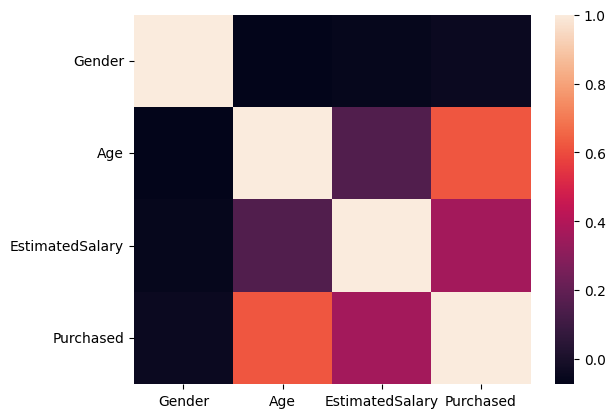

In [22]:
sns.heatmap(df.corr())

In [23]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
class LogisticRegressionScratch:
    def __init__(self, alpha=0.01, epochs=10000, tol=1e-6):
        self.alpha = alpha  
        self.epochs = epochs 
        self.tol = tol         
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        X = np.c_[np.ones(m), X] 
        self.theta = np.zeros(n + 1)

        for _ in range(self.epochs):
            y_pred = self.sigmoid(X @ self.theta) 
            gradient = (1/m) * X.T @ (y_pred - y)  

            if np.linalg.norm(gradient) < self.tol:  
                break

            self.theta -= self.alpha * gradient 

    def predict_proba(self, X):
        X = np.c_[np.ones(X.shape[0]), X] 
        return self.sigmoid(X @ self.theta)  

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int) 

In [26]:
log_reg = LogisticRegressionScratch(alpha=0.01, epochs=10000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy_score(y_test, y_pred)

C:\Users\Yakina\AppData\Local\Temp\ipykernel_12892\1586957437.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


0.35

In [27]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.8875

In [29]:
new_data = pd.DataFrame({'Age': [30], 'EstimatedSalary': [17000]})
model.predict(new_data)

array([0])

c:\Users\Yakina\anaconda3\envs\traineeship\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


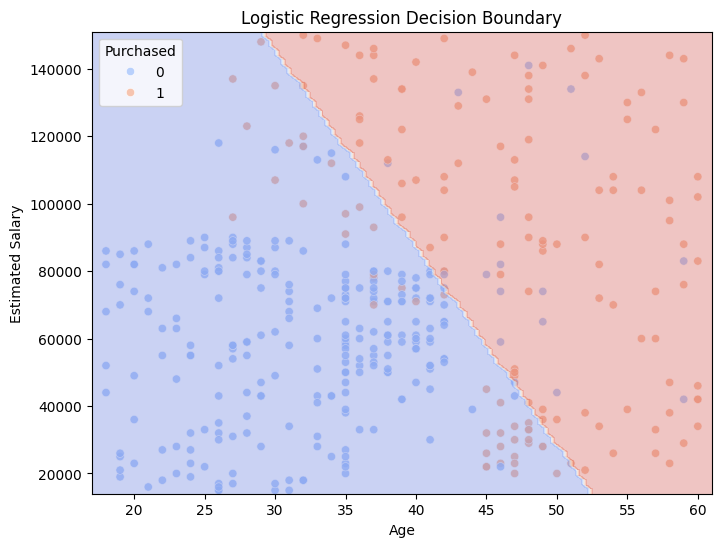

In [30]:

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased', palette='coolwarm', alpha=0.8)

x_min, x_max = X['Age'].min() - 1, X['Age'].max() + 1
y_min, y_max = X['EstimatedSalary'].min() - 1000, X['EstimatedSalary'].max() + 1000
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Logistic Regression Decision Boundary')
plt.show()

In [31]:
new_data = pd.DataFrame({'Age': [30], 'EstimatedSalary': [17000]})
model.predict(new_data)

array([0])